In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# Pandas

housing = pd.read_csv('housing.csv', header = 0, sep = ',')

# housing.head()
# housing.tail()
# housing[:]
# housing.shape

# housing.info()
# housing.columns
# housing['ocean_proximity'].unique()
# housing['ocean_proximity'].value_counts()
# housing[housing['ocean_proximity']=='ISLAND']
# housing[['population', 'ocean_proximity']][housing['ocean_proximity']=='ISLAND']
# housing.describe()

# plt

#housing.hist(bins=50, figsize=(20,15))
#plt.show()

train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 2)
train_set.shape
train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


(16512, 10)

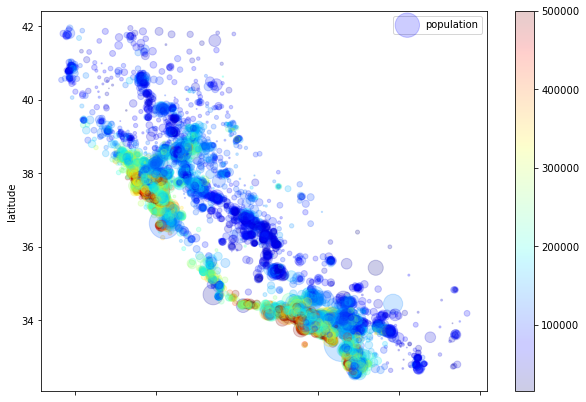

In [5]:
data = train_set.copy()
data.plot(kind="scatter", x="longitude", y="latitude", 
          s=data["population"]/30, label="population",
          c=data["median_house_value"], cmap=plt.get_cmap("jet"),
          figsize=(10,7), 
          alpha=0.2)
data.shape

In [6]:
# standaard correlation coefficient [-1, 1]
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689659
total_rooms           0.133218
housing_median_age    0.108626
households            0.063245
total_bedrooms        0.047478
population           -0.027441
longitude            -0.046754
latitude             -0.143970
Name: median_house_value, dtype: float64

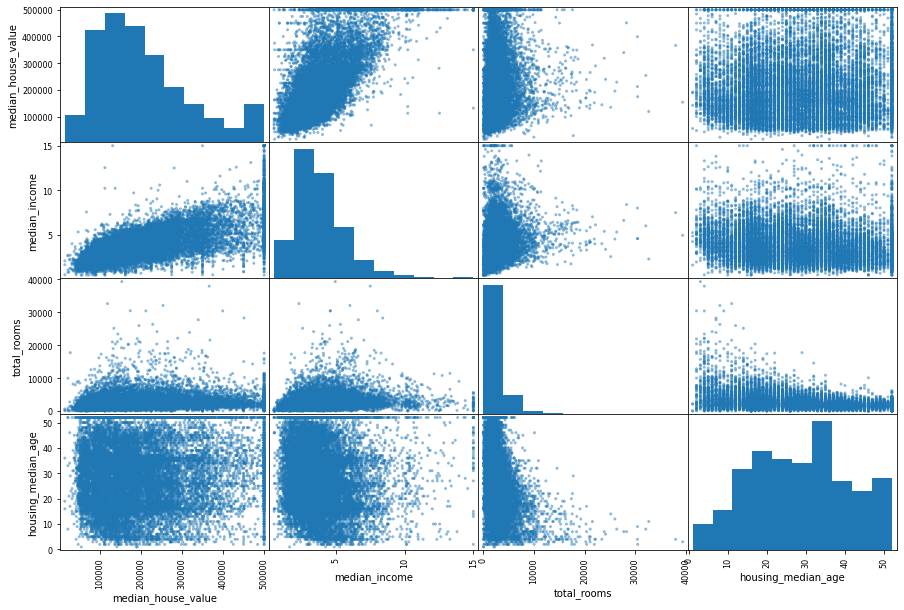

In [7]:
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[features], figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

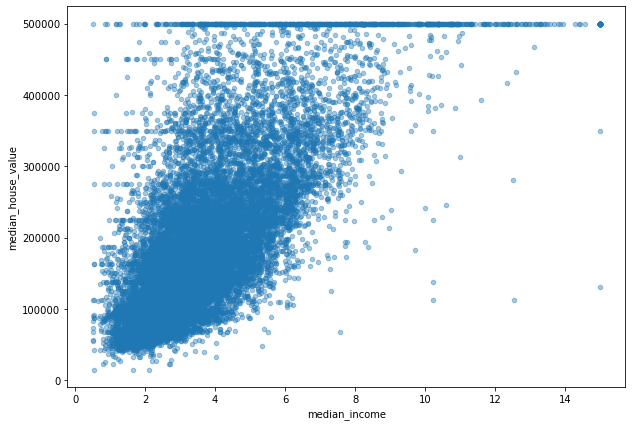

In [8]:
data.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(10,7), alpha=0.4)

In [9]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [10]:
data["total_rooms_per_households"] = data["total_rooms"]/data["households"]
data["total_bedrooms_per_total_rooms"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_households"] = data["population"]/data["households"]
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,4.443645,0.255262,3.350120
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,5.976471,0.171752,2.535294
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,4.088785,0.244571,4.350467
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,2.740088,0.368167,2.629956
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,5.166667,0.194069,3.037634
8781,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,<1H OCEAN,4.879098,0.196136,2.590164
5438,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,500001.0,<1H OCEAN,5.011905,0.209026,2.075397
14856,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,172800.0,NEAR OCEAN,5.439619,0.199611,2.279661
19956,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,108100.0,INLAND,6.045161,0.171825,3.153226
17175,-122.47,37.50,18.0,2297.0,416.0,1086.0,381.0,4.8750,334600.0,NEAR OCEAN,6.028871,0.181106,2.850394


In [11]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value                1.000000
median_income                     0.689659
total_rooms_per_households        0.157994
total_rooms                       0.133218
housing_median_age                0.108626
households                        0.063245
total_bedrooms                    0.047478
population                       -0.027441
population_per_households        -0.027454
longitude                        -0.046754
latitude                         -0.143970
total_bedrooms_per_total_rooms   -0.259574
Name: median_house_value, dtype: float64

In [12]:
#===== Prepare the Data =====
# Numerical data ===> missing values
# Categorical and Text Data ===> LabelEncoder, OneHotEndcoder
# Numerical data ===> Feature Scaling
# Numerical data ===> Custom Transformers

#===== SimpleImputer =====

df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis = 1)
# df.info()

df_num = df.drop("ocean_proximity", axis = 1)

#===== missing data (1.drop.rows, 2.drop columns, 3.replace)

#df_num = df_num.dropna(subset=["total_bedrooms"])     #option 1

#df_num.drop("total_bedrooms", axis=1)                 #option 2

#median = df_num["total_bedrooms"].median()            #option 3 (Best)
#df_num["total_bedrooms"].fillna(median)

# from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df_num)
x = imputer.transform(df_num)
df_num_impute_tr = pd.DataFrame(x, columns=df_num.columns)
df_num_impute_tr.info()
df.info()

df_num_impute_tr.head()

# ===== Custom Transformers =====

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    
custom = CombinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_impute_tr.columns)
columns.append("rooms_per_household")
columns.append("population_per_household")
columns.append("bedrooms_per_room")
data_custom_tr.columns = columns
data_custom_tr.head(10)

# ===== Feature Scaling =====

#data_custom_tr.describe()
# standardization(Best choice) or #Normalization [0,1]

from sklearn.preprocessing import StandardScaler

feature_scal = StandardScaler()
data_num_scaled_tr = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns=data_custom_tr.columns)
data_num_scaled_tr.head()

# ===== LabelEncoder =====

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_cat = df["ocean_proximity"]
data_cat_encoded = encoder.fit_transform(data_cat)
data_cat_encoded = pd.DataFrame(data_cat_encoded, columns=["ocean_proximity"])
data_cat_encoded.head()

# ===== OneHotEncoder =====

from sklearn.preprocessing import OneHotEncoder

encoder_1hot = OneHotEncoder(sparse=False)
data_cat_1hot_tmp = encoder_1hot.fit_transform(df[["ocean_proximity"]])
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp)
data_cat_1hot.columns = encoder_1hot.get_feature_names(['prox'])

final = pd.concat([data_num_scaled_tr, data_cat_1hot], axis=1)
final.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 2072 to 2575
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   to

C:\Users\bt162\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403,-0.425185,0.024660,0.658887,0.0,1.0,0.0,0.0,0.0
1,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623,0.247344,-0.049867,-0.669911,1.0,0.0,0.0,0.0,0.0
2,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425,-0.580880,0.116155,0.488784,0.0,1.0,0.0,0.0,0.0
3,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736,-1.172623,-0.041209,2.455426,1.0,0.0,0.0,0.0,0.0
4,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837,-0.107958,-0.003921,-0.314810,0.0,1.0,0.0,0.0,0.0
5,0.620480,-0.858555,0.267947,-0.118873,-0.168316,-0.147668,-0.034063,0.149805,-0.234129,-0.044848,-0.281914,1.0,0.0,0.0,0.0,0.0
6,0.565617,-0.755707,0.188566,-0.053377,-0.024128,-0.335905,0.007427,0.442011,-0.175860,-0.091931,-0.076809,1.0,0.0,0.0,0.0,0.0
7,1.243930,-1.396168,0.267947,1.125097,1.150651,0.619094,1.148390,0.141776,0.011800,-0.073248,-0.226629,0.0,0.0,0.0,0.0,1.0
8,0.116733,0.277445,-1.557798,0.498595,0.250066,0.448990,0.308226,0.178011,0.277483,0.006651,-0.668750,0.0,1.0,0.0,0.0,0.0
9,-1.449373,0.875831,-0.843376,-0.156816,-0.288867,-0.301366,-0.311524,0.533972,0.270335,-0.021047,-0.521074,0.0,0.0,0.0,0.0,1.0


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values
    
df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis = 1)

df_num = df.drop(["ocean_proximity"], axis = 1)
num_attrs = list(df_num)
cat_attrs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', SimpleImputer(missing_values = np.nan, strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)),
    ('one_hot_encoder', OneHotEncoder(sparse = False)),
    ])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared, columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                                                'total_bedrooms', 'population', 'households', 'median_income',
                                                                'rooms_per_household', 'population_per_household',
                                                                'bedrooms_per_room', 'prox_<1H OCEAN', 'prox_INLAND',
                                                                'prox_ISLAND', 'prox_NEAR BAY', 'prox_NEAR OCEAN'])
housing_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403,-0.425185,0.024660,0.658887,0.0,1.0,0.0,0.0,0.0
1,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623,0.247344,-0.049867,-0.669911,1.0,0.0,0.0,0.0,0.0
2,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425,-0.580880,0.116155,0.488784,0.0,1.0,0.0,0.0,0.0
3,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736,-1.172623,-0.041209,2.455426,1.0,0.0,0.0,0.0,0.0
4,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837,-0.107958,-0.003921,-0.314810,0.0,1.0,0.0,0.0,0.0


In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df, df_label)

sample_data_prepared = housing_prepared_df.iloc[:4]
print("predictions:\t", lin_reg.predict(sample_data_prepared))

sample_labels = df_label.iloc[:4]
print("Labels:\t\t", list(sample_labels))

predictions:	 [ 35948.11365309 315970.75227185  61237.85008003 152762.03983994]
Labels:		 [72000.0, 274100.0, 58300.0, 200000.0]


In [16]:
from sklearn.metrics import mean_squared_error

# RMSE => Root Mean Squared Error
housing_predictions = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(df_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68002.5992005227

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df, df_label)
housing_predictions = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(df_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared_df, df_label, scoring = "neg_mean_squared_error", cv = 10)
trees_rmse_scores = np.sqrt(-scores)

def display_scores(scores, model_name):
    print("==========", model_name, "==========")
    print("scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(trees_rmse_scores, "Decision Tree Regression")

========== Decision Tree Regression ==========
scores: [66252.48430383 69666.01304722 67665.41452798 70421.36318542
 68460.86630821 70948.97977676 72242.48240727 73825.6232131
 73077.61520556 74409.53508203]
Mean: 70697.03770573741
Standard deviation: 2584.0660257091995


In [19]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df, df_label)
forest_scores = cross_val_score(forest_reg, housing_prepared_df, df_label, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores, "Random Forest regression")

========== Random Forest regression ==========
scores: [51500.23210231 47426.09155551 47255.28262269 49761.73383719
 49803.32106035 49212.96720328 50486.54844483 51573.18335284
 50330.05897556 52487.41791852]
Mean: 49983.68370730798
Standard deviation: 1616.4531660681969


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 4, 6, 10, 30], 'max_features': [2, 6, 8, 15]}]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared_df, df_label)

print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ", grid_search.best_estimator_)

Best Parameters:  {'max_features': 6, 'n_estimators': 30}
Best Estimator:  RandomForestRegressor(max_features=6, n_estimators=30)


In [22]:
results = grid_search.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(np.sqrt(-mean_score), params)
    
    # Randomized Search => RandomizedSearchCV

63310.08503491006 {'max_features': 2, 'n_estimators': 3}
61295.204423475305 {'max_features': 2, 'n_estimators': 4}
58308.450460545275 {'max_features': 2, 'n_estimators': 6}
55064.285148401956 {'max_features': 2, 'n_estimators': 10}
52373.85435602926 {'max_features': 2, 'n_estimators': 30}
59762.968948052025 {'max_features': 6, 'n_estimators': 3}
56234.357581275384 {'max_features': 6, 'n_estimators': 4}
54565.98434528878 {'max_features': 6, 'n_estimators': 6}
52356.679781321756 {'max_features': 6, 'n_estimators': 10}
49928.428008503666 {'max_features': 6, 'n_estimators': 30}
58574.2563812341 {'max_features': 8, 'n_estimators': 3}
56422.31977033113 {'max_features': 8, 'n_estimators': 4}
53842.83488502663 {'max_features': 8, 'n_estimators': 6}
52140.79273901309 {'max_features': 8, 'n_estimators': 10}
49947.073925228215 {'max_features': 8, 'n_estimators': 30}
59162.98643953693 {'max_features': 15, 'n_estimators': 3}
56816.527804053265 {'max_features': 15, 'n_estimators': 4}
54689.676594896

In [26]:
# Test the final model on the test set

final_model = grid_search.best_estimator_
X = test_set.drop("median_house_value", axis=1)
y = test_set["median_house_value"].copy()
X_prepared = full_pipeline.transform(X)
final_predictions = final_model.predict(X_prepared)
final_mse = mean_squared_error(y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

C:\Users\bt162\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


49434.59223780062

In [ ]:
# document everything with clear visualizations and easy-to-remember statements

# Run, Predict & Enjoy! 